### Marketing Analytics Customer Segmentation 

Collecting the data from kaggle, obtain a dataset containing customer information. The data contains 2,205 observations and 39 columns.

To inspect the iFood dataset, I loaded it into a pandas DataFrame structure and examined the first 5 entries. 

The dataset contains a total of X columns and Y rows. Afterward, I identified duplicate rows and missing values, 
while also assessing the data types within the DataFrame.

In [3]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [4]:
# Load the data
data = pd.read_csv(r'D:\oasis intern projects\Projects\datasets\ifood_df.csv')

data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [5]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [6]:
data.isnull().sum().sum() 

0

In [7]:
# missing values
data.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [8]:
data.duplicated().sum()

184

In [9]:
# checking column type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [10]:
data.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

### Exploratory Data Analysis

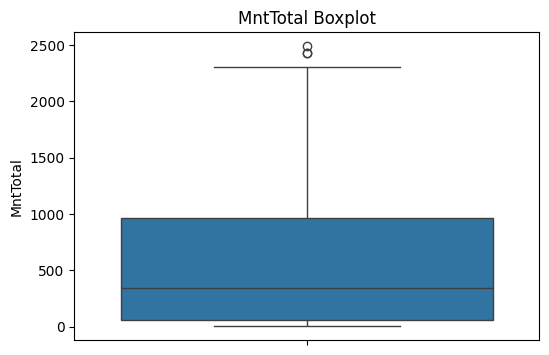

In [11]:
# Finding the outliers of the 'Mntotal' 
plt.figure(figsize = (6,4))
sns.boxplot(data = data, y = 'MntTotal')
plt.title('MntTotal Boxplot')
plt.ylabel('MntTotal')
plt.show()

In [12]:
# outliers in the MntTotal.
Quantile1 = data['MntTotal'].quantile(0.25)
Quantile3 = data['MntTotal'].quantile(0.75)

IQR = Quantile3 - Quantile1 

low_bound = Quantile1 - 1.5 * IQR
up_bound = Quantile3 + 1.5 * IQR

outliers = data[(data['MntTotal'] < low_bound) | (data['MntTotal'] > up_bound)]
outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


In [13]:
#removing Outliers
data = data[(data['MntTotal'] > low_bound) & (data['MntTotal'] < up_bound)]
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,...,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,...,0.257493,0.034514,0.089918,0.024523,0.504995,0.164396,0.216167,560.193915,516.178928,0.297457
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,...,0.437353,0.182587,0.286130,0.154702,0.500089,0.370719,0.411723,572.096830,549.962471,0.678134
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,342.500000,288.000000,0.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


In [14]:
# Encoding the format and combine it so it will only in one column for each features.
data['marital_Single'].replace(1,2, inplace = True)
data['marital_Together'].replace(1,3, inplace = True)
data['marital_Widow'].replace(1,4, inplace =True)
data['marital_Divorced'].replace(1,5, inplace = True)

data['marital_Status'] = data['marital_Married']+ data['marital_Single']+data['marital_Together']+data['marital_Widow']+data['marital_Divorced']
data['marital_Status'] = data['marital_Status'].map({1:'married', 2:'single', 3:'together', 4:'widow', 5:'divorced'})

In [15]:
cols_demographics = ['Income','Age']

In [16]:
data.drop(['marital_Married','marital_Single','marital_Divorced','marital_Together','marital_Widow'], axis=1, inplace=True)
data['marital_Status'].unique()

array(['single', 'together', 'married', 'divorced', 'widow'], dtype=object)

In [17]:
data['education_Basic'].replace(1,2, inplace = True)
data['education_Graduation'].replace(1,3, inplace = True)
data['education_Master'].replace(1,4, inplace = True)
data['education_PhD'].replace(1,5, inplace = True)

data['education_Status'] = data['education_2n Cycle']+data['education_Basic']+data['education_Graduation']+data['education_Master']+data['education_PhD']
data['education_Status'] = data['education_Status'].map({1:'2n cycle', 2:'basic', 3:'graduation', 4:'master', 5:'phd'})

In [18]:
data.drop(['education_2n Cycle','education_Basic','education_Graduation','education_Master','education_PhD'],axis = 1, inplace=True)
data['education_Status'].unique()

array(['graduation', 'phd', 'master', 'basic', '2n cycle'], dtype=object)

In [19]:
data.columns # here you can see the changes in marital_status and education_Status.

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'marital_Status', 'education_Status'],
      dtype='object')

In [20]:
data['total_kid'] = data['Kidhome']+data['Teenhome']
data.drop(['Kidhome', 'Teenhome'], axis =1 , inplace = True)

In [21]:
data['Frequency'] = data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumStorePurchases']

In [22]:
data.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_Status,education_Status,total_kid,Frequency
0,58138.0,58,635,88,546,172,88,88,3,8,...,1,63,2822,1529,1441,0,single,graduation,0,22
1,46344.0,38,11,1,6,2,1,6,2,1,...,0,66,2272,21,15,0,single,graduation,2,4
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,55,2471,734,692,0,together,graduation,0,20
3,26646.0,26,11,4,20,10,3,5,2,2,...,0,36,2298,48,43,0,together,graduation,1,6
4,58293.0,94,173,43,118,46,27,15,5,5,...,0,39,2320,407,392,0,married,phd,1,14


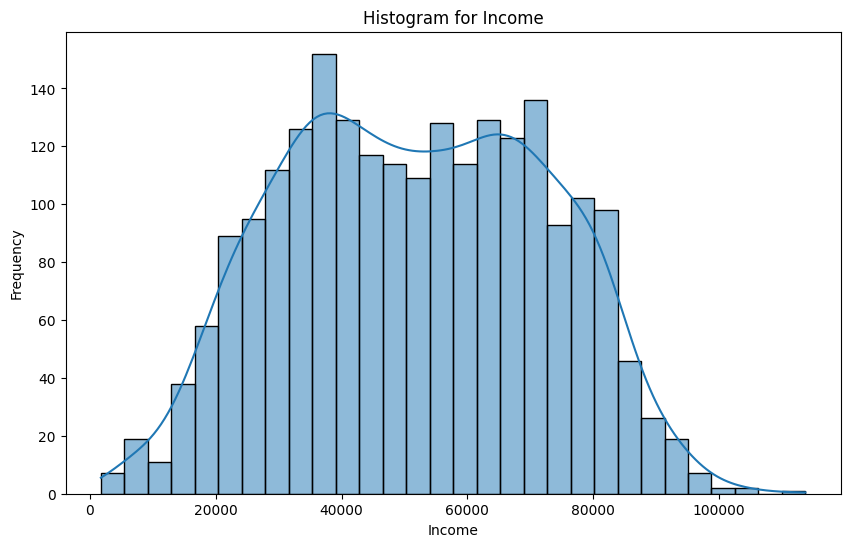

In [23]:
plt.figure(figsize = (10,6))
sns.histplot(data = data, x='Income', bins=30, kde = True)
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

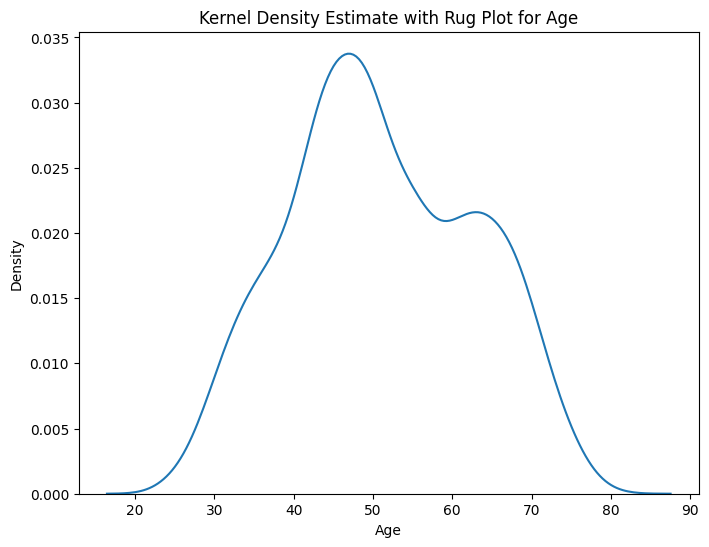

In [24]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='Age')
plt.title('Kernel Density Estimate with Rug Plot for Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show() 

### Correlation Matrix

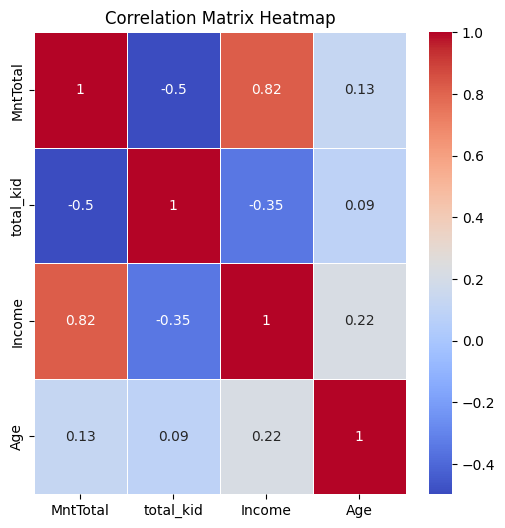

In [25]:
corr_matrix = data[['MntTotal']+['total_kid']+cols_demographics].corr()
plt.figure(figsize = (6,6))
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [26]:
data['marital_Status']

0         single
1         single
2       together
3       together
4        married
          ...   
2200     married
2201    together
2202    divorced
2203    together
2204     married
Name: marital_Status, Length: 2202, dtype: object

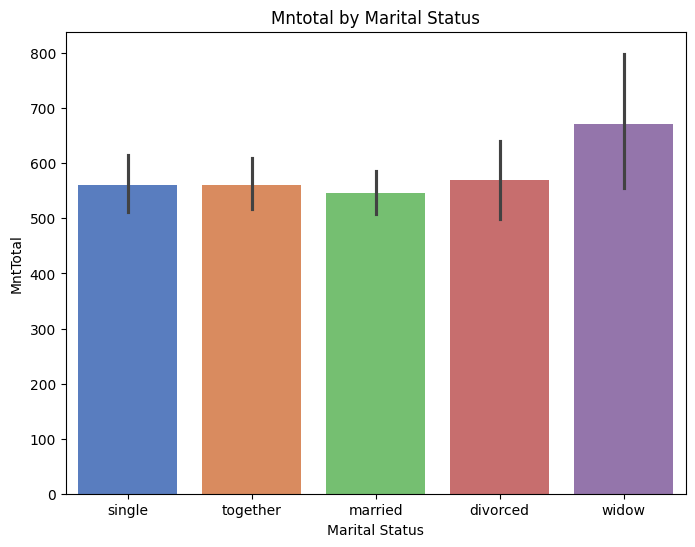

In [31]:
import seaborn as sns
plt.figure(figsize = (8,6))
sns.barplot(x = 'marital_Status', y = 'MntTotal', hue='marital_Status', data=data, palette='muted', legend = False)
plt.title('Mntotal by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('MntTotal')
plt.show()

In [35]:

def get_relationship(row):
    if row['marital_Status'] in ['married', 'together']:
        return 1
    else:
        return 0
data['In_Relationship'] = data.apply(get_relationship, axis = 1)
data.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_Status,education_Status,total_kid,Frequency,In_Relationship
0,58138.0,58,635,88,546,172,88,88,3,8,...,63,2822,1529,1441,0,single,graduation,0,22,0
1,46344.0,38,11,1,6,2,1,6,2,1,...,66,2272,21,15,0,single,graduation,2,4,0
2,71613.0,26,426,49,127,111,21,42,1,8,...,55,2471,734,692,0,together,graduation,0,20,1
3,26646.0,26,11,4,20,10,3,5,2,2,...,36,2298,48,43,0,together,graduation,1,6,1
4,58293.0,94,173,43,118,46,27,15,5,5,...,39,2320,407,392,0,married,phd,1,14,1


In [ ]:
# Calculate key metrics:

### K-means Clustering

K-means clustering is a method used to group similar data points into a fixed number of clusters. It works by iteratively assigning each data point to the nearest cluster centroid, then updating the centroids based on the mean of the points assigned to each cluster. This process repeats until the centroids no longer change significantly.


In [36]:
# Standardising Data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
clustering = ['Income', 'MntTotal', 'In_Relationship']
data_std = data.copy()
data_std[clustering] = std.fit_transform(data[clustering])
data_std[clustering].describe()

,Income,MntTotal,In_Relationship
count,2.202000e+03,2.202000e+03,2.202000e+03
mean,2.742785e-17,-8.873717e-17,-4.678869e-17
std,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.410685e+00,-9.724232e-01,-1.348874e+00
25%,-7.926475e-01,-8.815089e-01,-1.348874e+00
50%,-1.508040e-02,-3.806058e-01,7.413589e-01
75%,8.017617e-01,7.024988e-01,7.413589e-01
max,3.006747e+00,3.048788e+00,7.413589e-01


### Elbow Method

In [39]:
X = data_std[clustering]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters = K, random_state =7,  n_init=10).fit(X).inertia_
    inertia_list.append(inertia)

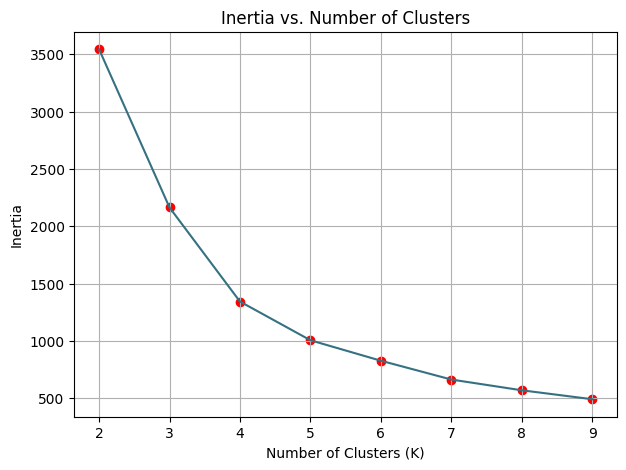

In [43]:
plt.figure(figsize=[7,5])
plt.plot(range(2,10),inertia_list, color = (54 / 255, 113 / 255, 130 / 255))
plt.scatter(range(2, 10), inertia_list, color='red', marker='o', label='Cluster Points')
plt.title('Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

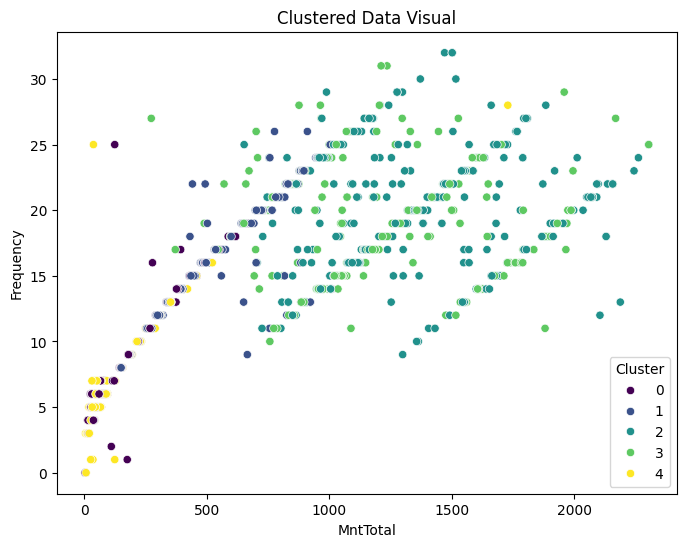

In [44]:
data['Cluster'] = KMeans(n_clusters=5, random_state=7, n_init=10).fit_predict(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x='MntTotal', y='Frequency', data=data, hue='Cluster', palette='viridis')
plt.title('Clustered Data Visual')
plt.xlabel('MntTotal')
plt.ylabel('Frequency')
plt.show()

C:\Users\ebich\AppData\Local\Temp\ipykernel_2260\979114070.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Income', data=data, palette='viridis')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


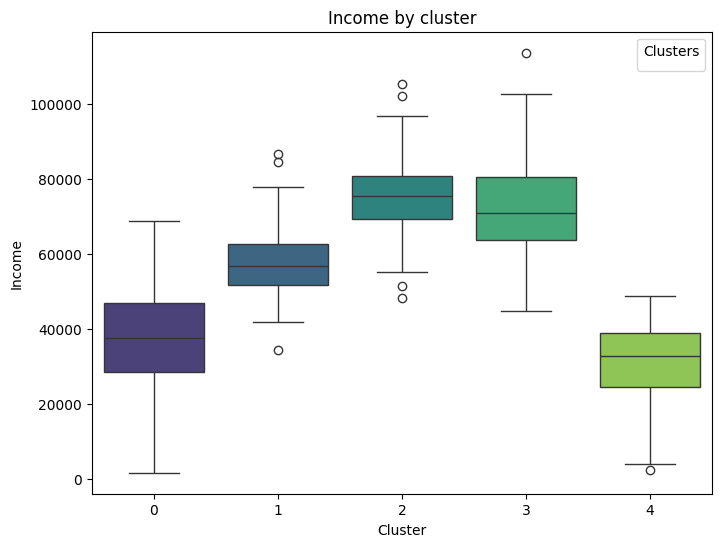

In [49]:
# Boxplot Income By Cluster

plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Income', data=data, palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.legend(title='Clusters')

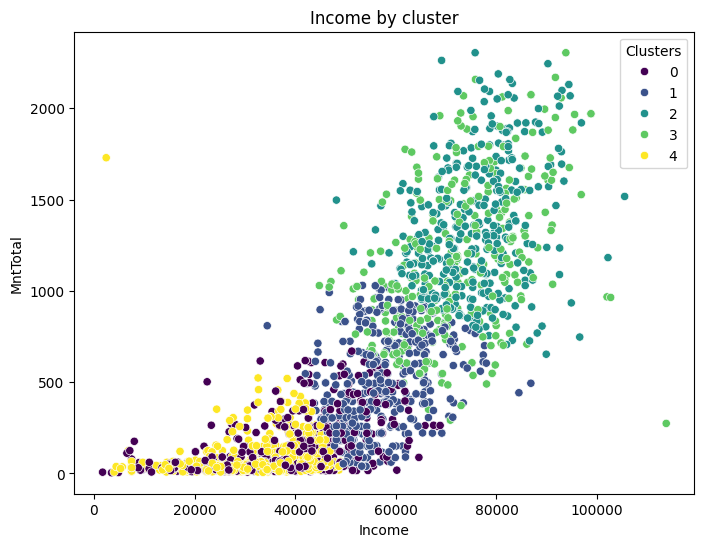

In [50]:
#Income By cluster scatterplot

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MntTotal', data=data, hue = 'Cluster', palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.legend(title='Clusters')

C:\Users\ebich\AppData\Local\Temp\ipykernel_2260\3633997741.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='In_Relationship', data=data, palette='viridis')


Text(0, 0.5, 'In_Relationship')

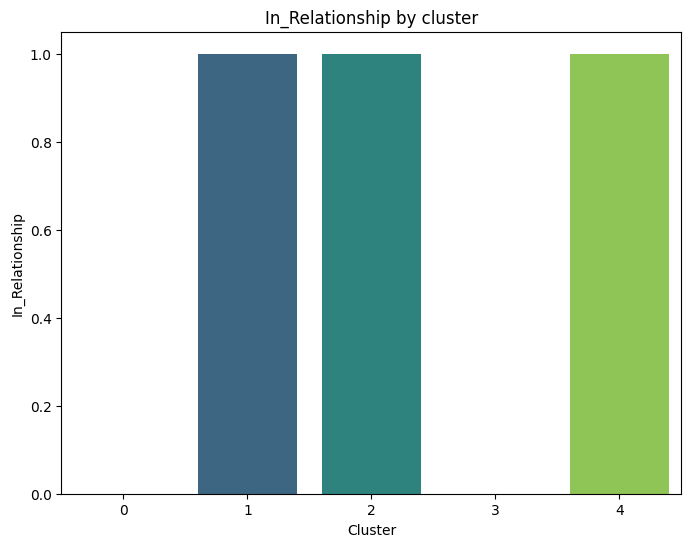

In [52]:
# Barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='In_Relationship', data=data, palette='viridis')
plt.title('In_Relationship by cluster')
plt.xlabel('Cluster')
plt.ylabel('In_Relationship')

### Recommendations
The aim of this data analytics project is to perform customer segmentaion analysis for an e-commerce company. What i am here doing with this data by analysing the data cleaning, whether data is structured or not, what is the customer behavior and purchase patterns, the goal is to group customers into distinct segments.

Practical experience with clustering algorithms. 